In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
folder = '../../results/'

figs = os.path.join(folder, 'figs')
file = os.path.join(folder, 'summarized-results.csv')

df = pd.read_csv(file)

category = 'FORK'
df_invo = df[df.Experiment == category]

### Normalize colors

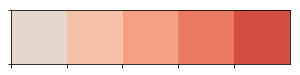

In [3]:
colors = sns.color_palette("coolwarm", 10)[5:]
sns.palplot(colors)

C:\Users\diego\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


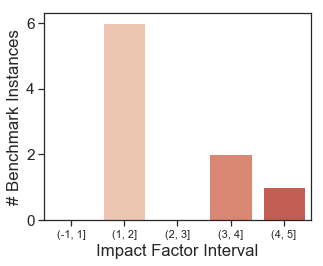

In [4]:
%matplotlib inline
sns.set(font_scale=1.4)
sns.set_style("ticks")
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


clrs = 'seismic'
clrs = 'coolwarm'
clrs = 'Reds'

def plot_binning_distro(df, identifier):   
    min_val = math.floor(df['New Factor'].min()) 
    max_val = int(df['New Factor'].max()) + 1  # 

    
    bins=[-1,1,2,3,4,max_val]
    
    binned_df = pd.cut(df['New Factor'], bins=bins).value_counts()
    # Sort first
    binned_df = binned_df.sort_index()
    plt.figure(figsize=(len(bins) * .8 ,4)) 
    plt.xticks(fontsize=11)
    ax = sns.barplot(x=binned_df.index, y=binned_df, palette=colors)
    ax.set(xlabel='Impact Factor Interval', ylabel='# Benchmark Instances')

    new_intervals = binned_df.index
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(new_intervals))

    figname = 'distribution-impact-%s.pdf' % identifier
    
    plt.savefig(os.path.join(figs, figname))
    #plt.clf()

plot_binning_distro(df_invo, category)

### Violinplot

C:\Users\diego\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


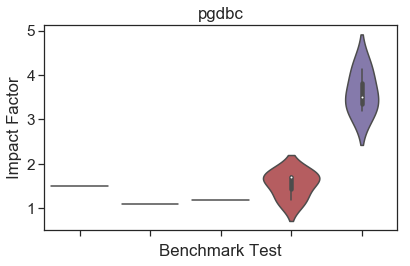

C:\Users\diego\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


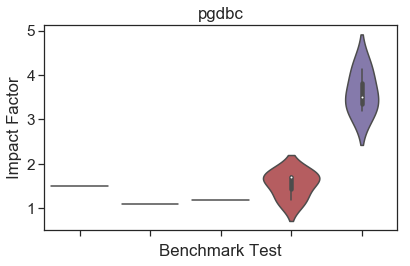

""


In [11]:
%matplotlib inline
sns.set(font_scale=1.4)
sns.set_style("ticks")
import math

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

clrs = 'seismic'
clrs = 'coolwarm'
clrs = 'Reds'

def box_plot(df):
    
    ax = sns.violinplot(data=df, x='Method', y='New Factor')
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.set(xlabel='Benchmark Test', ylabel='Impact Factor', title=df.name)
    
    figname = 'impact-%s-%s.pdf' % (df.name, category)
    plt.savefig(os.path.join(figs, figname))
    plt.show()

df_invo.groupby(by='Project').apply(box_plot)

### Generate Table

In [8]:

def analyze_bench_test(test):
    impacted = len(test[test['New Factor'] != 0])
    total = len(test)

    return pd.Series({'Impacted': impacted, 'Total':total})
    
def analyze_project(proj):
    
    result = proj.groupby(by='Method').apply(analyze_bench_test)
    
    versions_impacted = result['Impacted'].sum()
    total_versions = result['Total'].sum()
    
    bench_impacted = len(result[result['Impacted'] > 0])
    total_bench = len(result)
    
    return pd.Series({'Bench Impacted': bench_impacted, 'Total Bench': total_bench, 
                      '% Bench': bench_impacted / total_bench * 100,
        'Versions Impacted': versions_impacted, 'Total Versions': total_versions,
                     '% Version': versions_impacted / total_versions * 100})





table = df_invo.groupby(by='Project').apply(analyze_project)

table = table[['Bench Impacted', 'Total Bench', '% Bench', 'Versions Impacted', 'Total Versions','% Version']]
print(table.to_latex())


\begin{tabular}{lrrrrrr}
\toprule
{} &  Bench Impacted &  Total Bench &  \% Bench &  Versions Impacted &  Total Versions &  \% Version \\
Project &                 &              &          &                    &                 &            \\
\midrule
pgdbc   &             5.0 &          5.0 &    100.0 &                9.0 &             9.0 &      100.0 \\
\bottomrule
\end{tabular}



In [ ]:
table.sum(numeric_only=True)